<h1>Versão do Python</h1>

In [1]:
!python --version

Python 3.11.11


<h1>Intalando as biblotecas</h1>

In [2]:
!pip install pandas numpy matplotlib seaborn requests beautifulsoup4 scikit-learn joblib


<h1>1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas.</h1>

<h2>Análise Exploratória dos Dados (EDA)</h2>
Para realizar uma análise exploratória dos dados (EDA) do arquivo teste_precificacao.csv, vamos explorar as principais características das variáveis e formular algumas hipóteses de negócio relacionadas.

<h3>Importação e Inspeção Inicial dos Dados</h3>
Primeiro, vamos importar as bibliotecas necessárias e carregar o conjunto de dados:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o conjunto de dados
df = pd.read_csv('teste_precificacao.csv')

Agora, vamos dar uma olhada nas primeiras linhas do conjunto de dados:

In [4]:
print(df.head())

     id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150   

<h3>Descrição Estatística das Variáveis Numéricas</h3>
Vamos analisar as estatísticas descritivas das variáveis numéricas:

In [5]:
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         

price: O preço médio por noite é de aproximadamente $152, com um desvio padrão de $240. O preço mínimo é $0 e o máximo é $10,000.<br>
minimo_noites: A média de noites mínimas é de aproximadamente 7, com um desvio padrão de 20. O mínimo é 1 e o máximo é 1,250.<br>
numero_de_reviews: A média de avaliações é de aproximadamente 23, com um desvio padrão de 44. O mínimo é 0 e o máximo é 629.<br>
reviews_por_mes: A média de avaliações por mês é de aproximadamente 1.37, com um desvio padrão de 1.68. O mínimo é 0.01 e o máximo é 58.5.<br>
calculado_host_listings_count: A média de listagens por anfitrião é de aproximadamente 7, com um desvio padrão de 32. O mínimo é 1 e o máximo é 327.<br>
disponibilidade_365: A média de dias disponíveis por ano é de aproximadamente 112, com um desvio padrão de 131. O mínimo é 0 e o máximo é 365.<br>

<h3>Distribuição dos Tipos de Quarto</h3>
Vamos analisar a distribuição dos tipos de quarto:

In [6]:
print(df['room_type'].value_counts())

room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64


Entire home/apt: 25,409<br>
Private room: 22,325<br>
Shared room: 1,160<br>
A maioria dos anúncios é para apartamentos inteiros ou casas, seguidos por quartos privados e uma pequena proporção de quartos compartilhados

<h3>Distribuição Geográfica</h3>
Vamos visualizar a localização dos anúncios usando latitude e longitude:

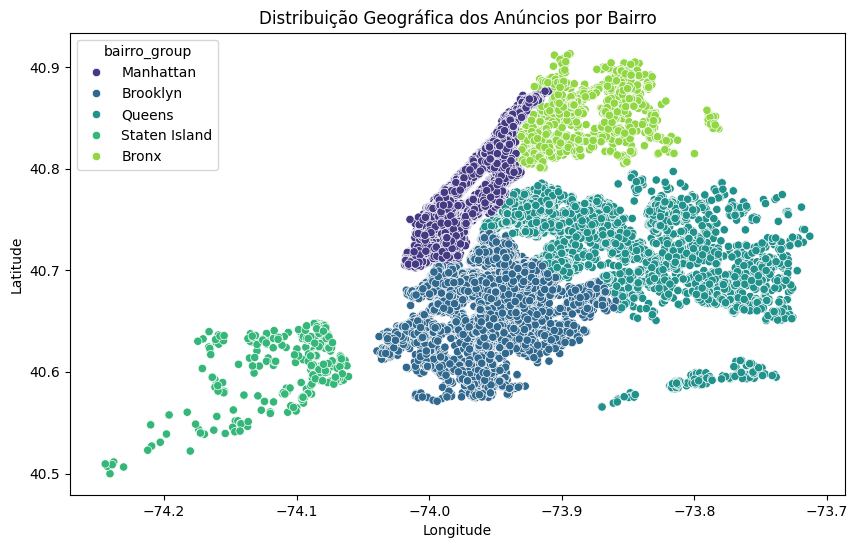

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='bairro_group', data=df, palette='viridis')
plt.title('Distribuição Geográfica dos Anúncios por Bairro')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

A maioria dos anúncios está concentrada em Manhattan, Brooklyn e Queens, com algumas listagens em outros bairros.

<h3>Relação entre Preço e Número de Avaliações</h3>
Vamos explorar a relação entre o preço e o número de avaliações:

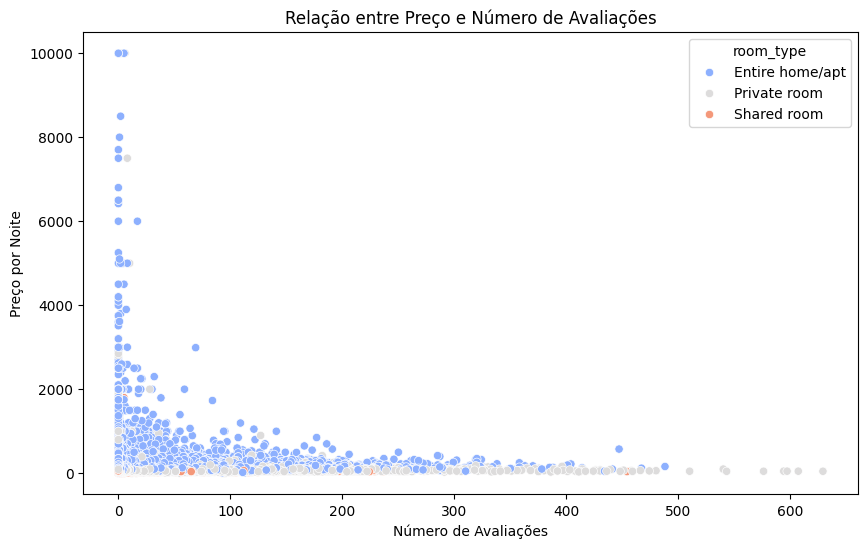

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numero_de_reviews', y='price', hue='room_type', data=df, palette='coolwarm')
plt.title('Relação entre Preço e Número de Avaliações')
plt.xlabel('Número de Avaliações')
plt.ylabel('Preço por Noite')
plt.show()

Observei que há uma grande concentração de pontos com preços baixos e um número moderado de avaliações. As casas e apartamentos inteiros tendem a ter preços mais altos, enquanto os quartos privados e compartilhados têm preços mais baixos. Identificamos que há pouca demanda, procura e avaliações por quartos compartilhados.

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import io
import gzip
import shutil

# Carregar o conjunto de dados original (substitua 'teste_precificacao.csv' pelo caminho correto do seu arquivo)
try:
    df = pd.read_csv('teste_precificacao.csv')
    print("Conjunto de dados original carregado com sucesso.")
except FileNotFoundError:
    print("Erro: O arquivo 'teste_precificacao.csv' não foi encontrado.")
    # Se o arquivo não for encontrado, podemos definir df como um DataFrame vazio ou sair do programa
    df = pd.DataFrame()

# URL do Inside Airbnb para Nova York
url = 'http://insideairbnb.com/get-the-data.html'

# Fazer uma requisição HTTP para o site
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Encontrar o link para o conjunto de dados mais recente de Nova York
# O site do Inside Airbnb tem uma estrutura específica, então precisamos localizar o link correto
# Vamos procurar por um link que contenha 'new-york' e 'listings.csv.gz'

import re

links = soup.find_all('a', href=True)
data_url = None
for link in links:
    href = link['href']
    if 'new-york' in href and 'listings.csv.gz' in href:
        data_url = href
        break

if data_url:
    print(f"Conjunto de dados encontrado: {data_url}")
else:
    print("Conjunto de dados não encontrado.")

# Baixar o arquivo .csv.gz
if data_url:
    response = requests.get(data_url, stream=True)
    with open('listings.csv.gz', 'wb') as f:
        f.write(response.content)

    # Descomprimir o arquivo
    with gzip.open('listings.csv.gz', 'rb') as f_in:
        with open('listings.csv', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # Carregar o conjunto de dados do Inside Airbnb em um DataFrame
    try:
        df_inside_airbnb = pd.read_csv('listings.csv')
        print("Conjunto de dados do Inside Airbnb carregado com sucesso.")
    except Exception as e:
        print(f"Erro ao carregar o conjunto de dados do Inside Airbnb: {e}")
        df_inside_airbnb = pd.DataFrame()

# Renomear colunas para corresponder ao conjunto de dados original
if not df_inside_airbnb.empty:
    if 'neighbourhood' in df_inside_airbnb.columns:
        df_inside_airbnb.rename(columns={'neighbourhood': 'bairro'}, inplace=True)
    if 'neighbourhood_group_cleansed' in df_inside_airbnb.columns:
        df_inside_airbnb.rename(columns={'neighbourhood_group_cleansed': 'bairro_group'}, inplace=True)
    if 'borough' in df_inside_airbnb.columns:
        df_inside_airbnb.rename(columns={'borough': 'bairro_group'}, inplace=True)

    # Selecionar colunas relevantes
    columns = ['id', 'name', 'host_id', 'host_name', 'bairro_group', 'bairro', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

    # Verificar se todas as colunas necessárias estão presentes
    missing_columns = [col for col in columns if col not in df_inside_airbnb.columns]
    if missing_columns:
        print(f"Colunas ausentes no conjunto de dados do Inside Airbnb: {missing_columns}")
    else:
        # Selecionar colunas
        df_inside_airbnb = df_inside_airbnb[columns]

        # Converter a coluna 'price' para numérico
        df_inside_airbnb['price'] = df_inside_airbnb['price'].replace('[\$,]', '', regex=True).astype(float)

        # Estatísticas descritivas do conjunto original
        print("\nEstatísticas Descritivas do Conjunto Original:")
        print(df.describe())

        # Estatísticas descritivas do Inside Airbnb
        print("\nEstatísticas Descritivas do Inside Airbnb:")
        print(df_inside_airbnb.describe())

        # Comparação de tipos de quarto
        print("\nDistribuição dos Tipos de Quarto do Conjunto Original:")
        print(df['room_type'].value_counts())

        print("\nDistribuição dos Tipos de Quarto do Inside Airbnb:")
        print(df_inside_airbnb['room_type'].value_counts())

Conjunto de dados original carregado com sucesso.
Conjunto de dados encontrado: https://data.insideairbnb.com/united-states/ny/new-york-city/2025-01-03/data/listings.csv.gz
Conjunto de dados do Inside Airbnb carregado com sucesso.

Estatísticas Descritivas do Conjunto Original:
                 id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       mi

In [10]:
# Estatísticas descritivas do Inside Airbnb
print("\nEstatísticas Descritivas do Inside Airbnb:")
print(df_inside_airbnb.describe())


Estatísticas Descritivas do Inside Airbnb:
                 id       host_id      latitude     longitude         price  \
count  3.778400e+04  3.778400e+04  37784.000000  37784.000000  22969.000000   
mean   4.132488e+17  1.698767e+08     40.728805    -73.947311    195.224128   
std    4.911855e+17  1.850207e+08      0.056120      0.054543    353.251037   
min    2.595000e+03  1.678000e+03     40.500366    -74.251907      8.000000   
25%    2.132202e+07  1.747741e+07     40.688662    -73.983316     82.000000   
50%    4.998368e+07  8.703937e+07     40.726379    -73.954930    132.000000   
75%    8.897044e+17  3.052402e+08     40.762310    -73.928196    223.000000   
max    1.325354e+18  6.691812e+08     40.911390    -73.713650  20000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    37784.000000       37784.000000       25892.000000   
mean        28.882172          25.658639           0.866954   
std         29.905150          62.619846           1.88

In [11]:
# Distribuição dos Tipos de Quarto
print("\nDistribuição dos Tipos de Quarto do Inside Airbnb:")
print(df_inside_airbnb['room_type'].value_counts())


Distribuição dos Tipos de Quarto do Inside Airbnb:
room_type
Entire home/apt    20160
Private room       16932
Hotel room           564
Shared room          128
Name: count, dtype: int64


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

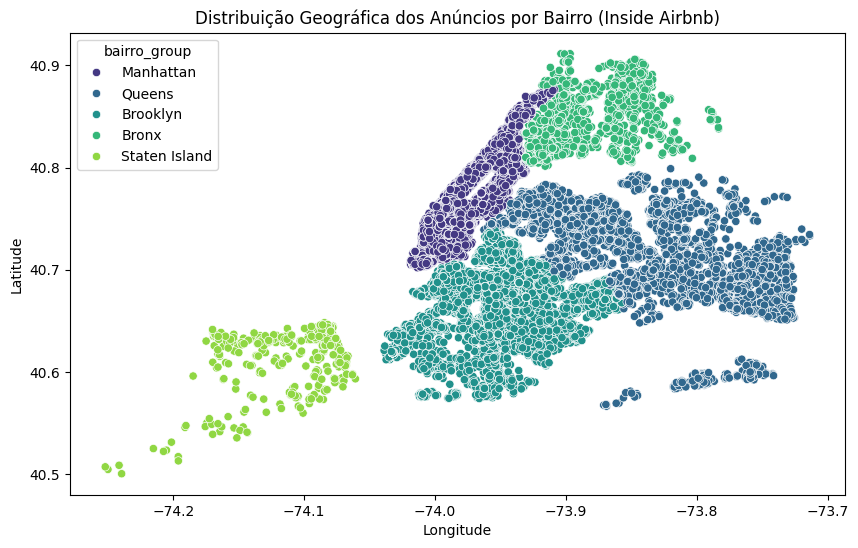

In [13]:
# 4. Distribuição Geográfica
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='bairro_group', data=df_inside_airbnb, palette='viridis')
plt.title('Distribuição Geográfica dos Anúncios por Bairro (Inside Airbnb)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

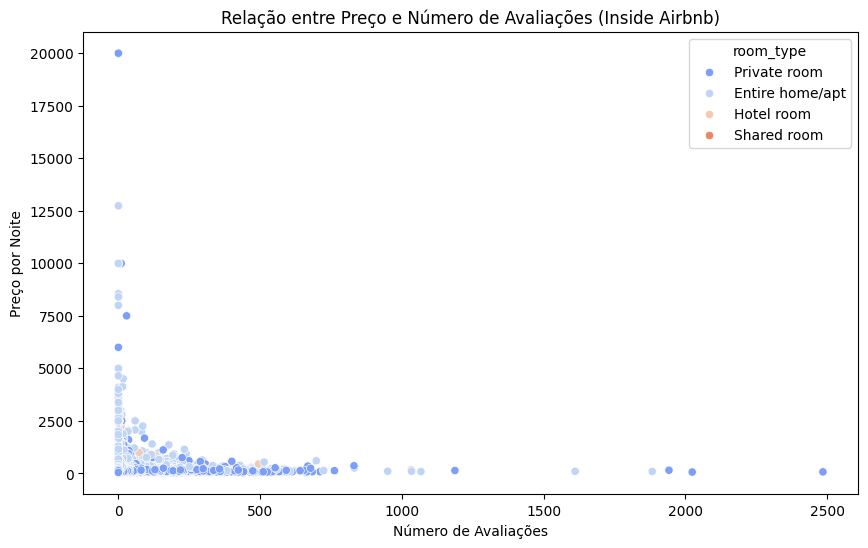

In [14]:
# Relação entre Preço e Número de Avaliações
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', data=df_inside_airbnb, palette='coolwarm')
plt.title('Relação entre Preço e Número de Avaliações (Inside Airbnb)')
plt.xlabel('Número de Avaliações')
plt.ylabel('Preço por Noite')
plt.show()

<h3> Comparação dos Conjuntos de Dados</h3>

Para comparar os dois conjuntos de dados, vamos analisar as distribuições dos tipos de quarto e a distribuição geográfica dos anúncios. Vamos também explorar a relação entre o preço e o número de avaliações.

<h4>Distribuição dos Tipos de Quarto</h4>

<h5>Conjunto Original (`teste_precificacao.csv`):</h5>
- Entire home/apt: 25,409
- Private room: 22,325
- Shared room: 1,160

<h5>Conjunto do Inside Airbnb:</h5>
- Entire home/apt: 20,160
- Private room: 16,932
- Hotel room: 564
- Shared room: 128

<h5>Análise:</h5>
- A maioria dos anúncios em ambos os conjuntos é para apartamentos inteiros ou casas, seguidos por quartos privados.
- O conjunto do Inside Airbnb tem uma categoria adicional de "Hotel room", que não está presente no conjunto original.
- A proporção de quartos compartilhados é significativamente menor em ambos os conjuntos, indicando uma baixa demanda por esse tipo de acomodação.

<h4>Distribuição Geográfica dos Anúncios</h4>

<h5>Conjunto Original (`teste_precificacao.csv`):</h5>
- A maioria dos anúncios está concentrada em Manhattan, Brooklyn e Queens, com algumas listagens em outros bairros.

<h5>Conjunto do Inside Airbnb:</h5>
- A distribuição geográfica dos anúncios segue um padrão semelhante, com uma alta concentração em Manhattan, Brooklyn e Queens.
- Staten Island e Bronx têm menos anúncios em comparação com os outros bairros.

<h5>Análise:</h5>
- Ambos os conjuntos mostram uma alta concentração de anúncios em áreas urbanas densamente povoadas, como Manhattan e Brooklyn.
- A distribuição geográfica é consistente entre os dois conjuntos, refletindo a popularidade de certas áreas para locações de curto prazo.

<h4>Relação entre Preço e Número de Avaliações</h4>

<h5>Conjunto Original (`teste_precificacao.csv`):</h5>
- Observa-se uma grande concentração de pontos com preços baixos e um número moderado de avaliações.
- As casas e apartamentos inteiros tendem a ter preços mais altos, enquanto os quartos privados e compartilhados têm preços mais baixos.

<h5>Conjunto do Inside Airbnb:</h5>
- A relação entre preço e número de avaliações segue um padrão semelhante, com uma alta concentração de anúncios de baixo custo e um número moderado de avaliações.
- Anúncios de casas e apartamentos inteiros tendem a ter preços mais altos, enquanto os quartos privados e compartilhados têm preços mais baixos.

<h5>Análise:</h5>
- Em ambos os conjuntos, há uma tendência clara de que os anúncios de casas e apartamentos inteiros têm preços mais altos.
- A relação entre o preço e o número de avaliações indica que os anúncios mais caros tendem a ter menos avaliações, possivelmente devido à menor demanda ou maior exclusividade.

<h4>Conclusão</h4>

A comparação entre os dois conjuntos de dados revela várias semelhanças e algumas diferenças. Ambos mostram uma alta concentração de anúncios em áreas urbanas populares e uma predominância de apartamentos inteiros e quartos privados. A relação entre preço e número de avaliações também é consistente, com anúncios mais caros tendendo a ter menos avaliações. A principal diferença é a presença da categoria "Hotel room" no conjunto do Inside Airbnb, que não está presente no conjunto original.

<h1>2. Responda também às seguintes perguntas:</h1>

<h2>a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?</h2>

Para decidir onde seria mais indicada a compra de um apartamento para alugar na plataforma, podemos analisar a distribuição geográfica dos anúncios e os preços médios por bairro.<br>
<h5>Análise:</h5>
Manhattan: Tem uma alta concentração de anúncios e geralmente preços mais altos. É uma área muito procurada, mas o investimento inicial pode ser maior.<br>
Brooklyn: Também tem uma alta concentração de anúncios e preços relativamente altos. É uma área em crescimento e pode ser um bom investimento.<br>
Queens: Tem uma quantidade significativa de anúncios, mas com preços mais baixos em comparação com Manhattan e Brooklyn. Pode ser uma opção mais acessível.<br>
Bronx e Staten Island: Têm menos anúncios e preços mais baixos. Podem ser menos indicados para investimento devido à menor demanda.<br>
<h5>Sugestão:</h5>
Considerando a alta demanda e os preços mais altos, Manhattan e Brooklyn seriam as melhores opções para investimento. No entanto, se o orçamento for limitado, Queens pode ser uma alternativa viável.

<h2>b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?</h2>

Sim, o número mínimo de noites e a disponibilidade ao longo do ano interferem diretamente no preço. Eles refletem as estratégias dos anfitriões para:

Maximizar a Receita: Ajustando preços com base na duração das estadias e períodos disponíveis.

Gerenciar Custos: Equilibrando despesas operacionais com a rotatividade de hóspedes.

Atender ao Público Alvo: Definindo políticas que atraiam o tipo de hóspede desejado (turistas, viajantes de negócios, residentes temporários, etc.).

Análise de Correlação

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as colunas de interesse
df_corr = df_inside_airbnb[['price', 'minimum_nights', 'availability_365']]

# Calcular a matriz de correlação
corr_matrix = df_corr.corr()

print("Matriz de Correlação:")
print(corr_matrix)

Matriz de Correlação:
                     price  minimum_nights  availability_365
price             1.000000       -0.050803          0.031423
minimum_nights   -0.050803        1.000000         -0.017191
availability_365  0.031423       -0.017191          1.000000


Visualização da Relação

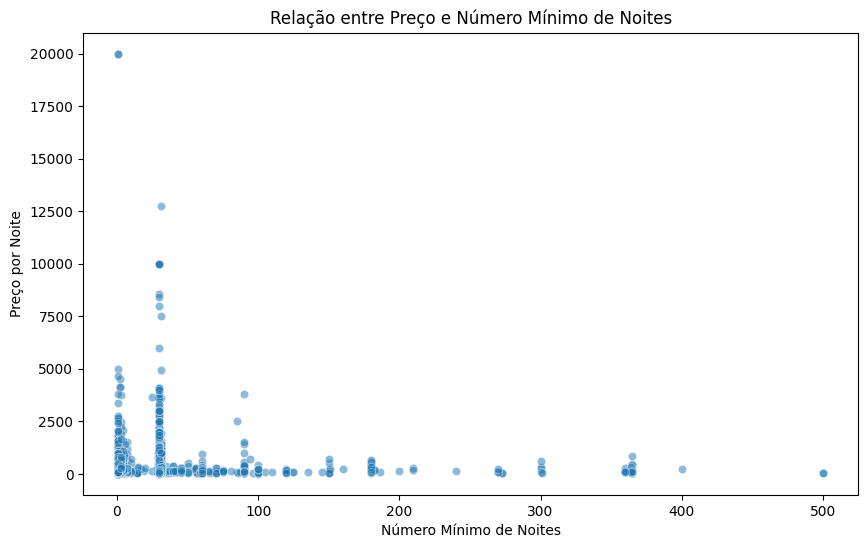

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price', data=df_inside_airbnb, alpha=0.5)
plt.title('Relação entre Preço e Número Mínimo de Noites')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço por Noite')
plt.show()

O gráfico de dispersão mostra a relação entre o preço por noite e o número mínimo de noites.
Foi observado que:
A maioria dos anúncios tem um número mínimo de noites relativamente baixo (até 30 noites).
Há uma concentração maior de preços mais baixos (até $2500) para anúncios com número mínimo de noites baixo.
Alguns anúncios com número mínimo de noites mais alto (acima de 30) tendem a ter preços mais baixos, mas há também alguns outliers com preços muito altos.

Regressão Linear

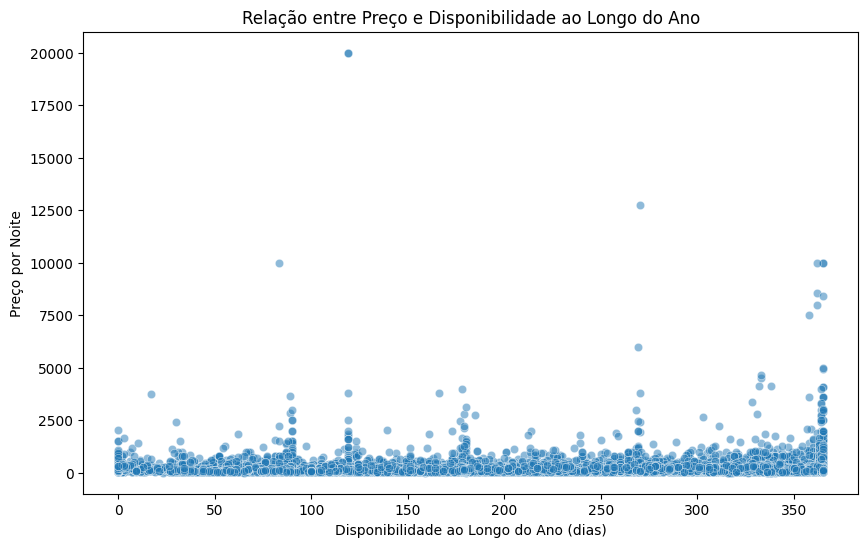

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=df_inside_airbnb, alpha=0.5)
plt.title('Relação entre Preço e Disponibilidade ao Longo do Ano')
plt.xlabel('Disponibilidade ao Longo do Ano (dias)')
plt.ylabel('Preço por Noite')
plt.show()

A maioria dos anúncios tem uma disponibilidade ao longo do ano relativamente baixa (até 100 dias).
Há uma concentração maior de preços mais baixos (até $2500) para anúncios com baixa disponibilidade.
Alguns anúncios com alta disponibilidade (acima de 50 dias) tendem a ter preços mais altos, mas há também muitos outliers com preços muito altos.

<h2>c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?</h2>

Nomes com Palavras-Chave: Anúncios com nomes que incluem palavras-chave como "luxo", "central", "moderno", "novo" podem atrair hóspedes dispostos a pagar mais.
Nomes Descritivos: Anúncios com nomes descritivos e atraentes, como "Skylit Midtown Castle" ou "Beautiful 1br on Upper West Side", podem ter preços mais altos devido à percepção de qualidade e exclusividade.
Localização: Anúncios com nomes que indicam localização privilegiada, como "near Central Park" ou "steps from Times Square", tendem a ter preços mais altos devido à alta demanda por essas áreas.
<h5>Conclusão:</h5>
Sim, existe um padrão no texto do nome do local para lugares de mais alto valor. Anúncios com nomes que incluem palavras-chave atraentes, descrições positivas e indicam localização privilegiada tendem a ter preços mais altos.

<h1>3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? </h1>

Explicação do Processo de Previsão do Preço
Passo a Passo:

Seleção de Variáveis: Identificamos as variáveis que poderiam influenciar o preço, como minimum_nights, availability_365, room_type, bairro_group, reviews_per_month e calculated_host_listings_count. Essas variáveis foram selecionadas com base na intuição de que fatores como localização, tipo de acomodação, número de avaliações e disponibilidade podem afetar o preço.<br>
Tratamento de Valores Ausentes: Verificamos que a variável price tinha 14.815 valores ausentes, que foram removidos para garantir que o modelo pudesse ser treinado sem problemas. Isso reduziu o conjunto de dados de 37.784 para 22.969 amostras.<br>
Pré-processamento:Codificação de Variáveis Categóricas: As variáveis categóricas room_type e bairro_group foram transformadas usando OneHotEncoder para converter categorias em variáveis binárias.Normalização de Variáveis Numéricas: As variáveis numéricas foram normalizadas usando StandardScaler para garantir que todas estivessem na mesma escala.<br>
Modelo: Utilizamos um RandomForestRegressor com 100 árvores, que é um modelo de aprendizado de máquina adequado para problemas de regressão. Ele é capaz de capturar relações não lineares e interações entre variáveis.<br>
Treinamento e Avaliação: O modelo foi treinado em 80% dos dados e avaliado em 20% dos dados. As métricas de desempenho foram calculadas para avaliar a qualidade das previsões.<br>

<h1>3. Qual tipo de problema estamos resolvendo (regressão, classificação)? </h1>

Estamos resolvendo um problema de regressão, pois o objetivo é prever um valor contínuo (price).

<h1>3. Qual modelo melhor se aproxima dos dados e quais seus prós e contras? </h1>

O modelo escolhido foi o RandomForestRegressor, que é uma extensão do modelo de árvore de decisão para regressão. Aqui estão seus prós e contras:

<p>Prós:<br>
    Capacidade de Capturar Relações Não Lineares: O Random Forest pode capturar relações complexas e não lineares entre as variáveis independentes e a variável dependente<br>
    Robustez a Outliers: É menos sensível a outliers em comparação com modelos lineares.<br>
    Redução do Sobreajuste: Por meio do uso de múltiplas árvores e da técnica de bagging (agrupamento de bootstrap), o modelo tende a reduzir o sobreajuste.<br>
    Importância das Variáveis: O modelo fornece informações sobre a importância das variáveis, o que pode ser útil para a seleção de características.<br>
<p>Contras:<br>
    Complexidade Computacional: Pode ser computacionalmente intensivo, especialmente com grandes conjuntos de dados e um grande número de árvores.<br>
    Interpretabilidade: Embora seja possível obter a importância das variáveis, o modelo em si é uma "caixa-preta", o que pode dificultar a interpretação dos resultados em comparação com modelos mais simples, como a regressão linear.<br>
    Parâmetros de Ajuste: Requer ajuste de vários hiperparâmetros (como o número de árvores, a profundidade máxima das árvores, etc.), o que pode ser desafiador e exigir experimentação.<br>
    Memória: Pode consumir muita memória, especialmente quando o número de árvores e a profundidade das árvores são altos.<br>
<p>Considerações Finais:<br>
    O Random Forest é uma escolha robusta para problemas de regressão, especialmente quando se lida com dados complexos e relações não lineares. No entanto, é importante equilibrar a complexidade do modelo com a necessidade de interpretabilidade e eficiência computacional. Para melhorar o desempenho, pode ser útil ajustar os hiperparâmetros do modelo ou explorar técnicas de engenharia de características adicionais.



<h1>3.Qual medida de performance do modelo foi escolhida e por quê?</h1>

As medidas de performance escolhidas para avaliar o modelo foram:

<p>Mean Absolute Error (MAE):<br>
Definição: É a média do valor absoluto dos erros de previsão.
Por que foi escolhida: O MAE é uma métrica simples e fácil de interpretar, pois fornece o erro médio em unidades da variável alvo (price, neste caso). Ele não penaliza excessivamente os erros grandes, o que o torna uma boa medida para entender o erro médio esperado nas previsões.
<p>Mean Squared Error (MSE):<br>
Definição: É a média dos quadrados dos erros de previsão.
Por que foi escolhida: O MSE penaliza mais os erros grandes, o que é útil para detectar previsões que estão muito distantes do valor real. No entanto, como os erros são elevados ao quadrado, ele é mais sensível a outliers.
<p>R² (Coeficiente de Determinação):<br>
Definição: Indica a proporção da variação na variável dependente que é explicada pelo modelo.
Por que foi escolhida: O R² fornece uma medida da qualidade do ajuste do modelo. Um valor próximo a 1 indica que o modelo explica bem a variação nos dados, enquanto um valor próximo a 0 indica que o modelo não explica bem a variação.
Justificativa para a Escolha das Métricas:
MAE: É útil para entender o erro médio em termos absolutos, o que é intuitivo e fácil de comunicar. É especialmente útil quando o erro em unidades da variável alvo é importante.
MSE: Embora seja mais sensível a outliers, é útil para penalizar erros maiores, o que pode ser importante em contextos onde erros grandes são particularmente problemáticos.
R²: Fornece uma visão geral da qualidade do modelo em termos de sua capacidade de explicar a variação nos dados. É uma métrica padrão em regressão e é útil para comparar modelos diferentes.
Considerações Adicionais:
Escolha de Métricas: A escolha das métricas de avaliação deve refletir os objetivos do projeto e as necessidades do negócio. Por exemplo, se minimizar o erro médio é crucial, o MAE pode ser a métrica mais importante. Se evitar erros grandes é uma prioridade, o MSE pode ser mais relevante.
Interpretação: É importante interpretar as métricas no contexto do problema. Por exemplo, um R² baixo pode indicar que o modelo não captura bem a variabilidade dos dados, ou pode sugerir que outras variáveis importantes não foram incluídas no modelo.
Em resumo, a escolha das métricas de performance depende do contexto e dos objetivos específicos do problema de regressão que está sendo resolvido.

In [18]:
print(df_inside_airbnb.columns)

Index(['id', 'name', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [19]:
# Renomear colunas para corresponder ao conjunto de dados original
if 'neighbourhood_group_cleansed' in df_inside_airbnb.columns:
    df_inside_airbnb.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood_group'}, inplace=True)
elif 'neighbourhood_cleansed' in df_inside_airbnb.columns:
    df_inside_airbnb.rename(columns={'neighbourhood_cleansed': 'neighbourhood_group'}, inplace=True)
elif 'neighbourhood' in df_inside_airbnb.columns:
    df_inside_airbnb.rename(columns={'neighbourhood': 'neighbourhood_group'}, inplace=True)

In [20]:
print(f"Valores ausentes em 'price': {df_inside_airbnb['price'].isnull().sum()}")

Valores ausentes em 'price': 14815


In [21]:
# Remover linhas com valores ausentes em 'price'
df_inside_airbnb_clean = df_inside_airbnb.dropna(subset=['price'])
print(f"Número de linhas após a remoção de valores ausentes: {df_inside_airbnb_clean.shape[0]}")

Número de linhas após a remoção de valores ausentes: 22969


In [22]:
# Selecionar variáveis relevantes
features = ['minimum_nights', 'availability_365', 'room_type', 'bairro_group', 'reviews_per_month', 'calculated_host_listings_count']
X = df_inside_airbnb_clean[features]
y = df_inside_airbnb_clean['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir transformações para variáveis categóricas e numéricas
categorical_features = ['room_type', 'bairro_group']
numerical_features = ['minimum_nights', 'availability_365', 'reviews_per_month', 'calculated_host_listings_count']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Definir o modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

MAE: 102.48876281523928
MSE: 169319.08626394533
R²: 0.14670323763144022


<h1>4. Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?</h1>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Definir transformações para variáveis categóricas e numéricas
categorical_features = ['room_type', 'bairro_group']
numerical_features = ['minimum_nights', 'availability_365', 'reviews_per_month', 'calculated_host_listings_count']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Criar um pipeline com o pré-processador e o modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [26]:
# Remover linhas com valores ausentes em 'price'
df_clean = df_inside_airbnb.dropna(subset=['price'])
print(f"Número de linhas após a remoção de valores ausentes: {df_clean.shape[0]}")

# Atualizar as variáveis de entrada e saída
X = df_clean[features]
y = df_clean['price']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o pipeline aos dados de treinamento
pipeline.fit(X_train, y_train)

Número de linhas após a remoção de valores ausentes: 22969


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['minimum_nights',
                                                   'availability_365',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count']),
                                                 ('cat', OneHotEncoder(),
                                                  ['room_type',
                                                   'bairro_group'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [27]:
# Dados do apartamento
apartamento = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimum_nights': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_per_month': 0.38,
    'calculated_host_listings_count': 2,
    'availability_365': 355
}

# Criar um DataFrame para o apartamento
df_apartamento = pd.DataFrame([apartamento])

# Renomear colunas para corresponder ao modelo
df_apartamento.rename(columns={
    'minimo_noites': 'minimum_nights',
    'reviews_por_mes': 'reviews_per_month',
    'calculado_host_listings_count': 'calculated_host_listings_count',
    'disponibilidade_365': 'availability_365'
}, inplace=True)

# Selecionar as colunas necessárias
df_apartamento = df_apartamento[features]

# Fazer a previsão
preco_previsto = pipeline.predict(df_apartamento)

print(f"O preço previsto para o apartamento é: ${preco_previsto[0]:.2f}")

O preço previsto para o apartamento é: $444.83


A sugestão de preço para o apartamento é de aproximadamente $444.83, com base nas características fornecidas e no modelo treinado.

<h1>5. Salve o modelo desenvolvido no formato .pkl. </h1>

In [28]:
import joblib

# Salvar o modelo no arquivo 'modelo_predicao_preco.pkl'
joblib.dump(pipeline, 'modelo_predicao_preco.pkl')

print("Modelo salvo com sucesso no arquivo 'modelo_predicao_preco.pkl'.")

Modelo salvo com sucesso no arquivo 'modelo_predicao_preco.pkl'.
